<a href="https://colab.research.google.com/github/nikhilkoduvalli/Machine_Learning/blob/main/model_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_excel('/content/Date-Wise-Prices-all-Commodity.xlsx')
df

,diffgr:id,msdata:rowOrder,State,District,Market,Commodity,Variety,Grade,Arrival_Date,Min_x0020_Price,Max_x0020_Price,Modal_x0020_Price
0,Table1,0,Andhra Pradesh,Chittor,Chittoor,Gur(Jaggery),NO 1,FAQ,24/02/2023,4000,4100.0,4000.0
1,Table2,1,Andhra Pradesh,Chittor,Chittoor,Gur(Jaggery),NO 2,FAQ,24/02/2023,3000,3500.0,3500.0
2,Table3,2,Andhra Pradesh,Chittor,Chittoor,Gur(Jaggery),NO 3,FAQ,24/02/2023,2300,2300.0,2300.0
3,Table4,3,Andhra Pradesh,Chittor,Punganur,Tomato,Hybrid,FAQ,24/02/2023,1340,2000.0,1670.0
4,Table5,4,Andhra Pradesh,Chittor,Vayalapadu,Tomato,Local,FAQ,24/02/2023,640,2160.0,1400.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6430,Table6431,6430,West Bengal,Sounth 24 Parganas,Diamond Harbour(South 24-pgs),Onion,Red,FAQ,24/02/2023,1400,1500.0,1450.0
6431,Table6432,6431,West Bengal,Sounth 24 Parganas,Diamond Harbour(South 24-pgs),Potato,Jyoti,FAQ,24/02/2023,760,800.0,780.0
6432,Table6433,6432,West Bengal,Sounth 24 Parganas,Diamond Harbour(South 24-pgs),Rice,Common,FAQ,24/02/2023,2700,2900.0,2800.0
6433,Table6434,6433,West Bengal,Sounth 24 Parganas,Diamond Harbour(South 24-pgs),Rice,Super Fine,FAQ,24/02/2023,4700,4900.0,4800.0


In [120]:
df.head()

,diffgr:id,msdata:rowOrder,State,District,Market,Commodity,Variety,Grade,Arrival_Date,Min_x0020_Price,Max_x0020_Price,Modal_x0020_Price
0,Table1,0,Andhra Pradesh,Chittor,Chittoor,Gur(Jaggery),NO 1,FAQ,24/02/2023,4000,4100.0,4000.0
1,Table2,1,Andhra Pradesh,Chittor,Chittoor,Gur(Jaggery),NO 2,FAQ,24/02/2023,3000,3500.0,3500.0
2,Table3,2,Andhra Pradesh,Chittor,Chittoor,Gur(Jaggery),NO 3,FAQ,24/02/2023,2300,2300.0,2300.0
3,Table4,3,Andhra Pradesh,Chittor,Punganur,Tomato,Hybrid,FAQ,24/02/2023,1340,2000.0,1670.0
4,Table5,4,Andhra Pradesh,Chittor,Vayalapadu,Tomato,Local,FAQ,24/02/2023,640,2160.0,1400.0


In [121]:
df.tail()

,diffgr:id,msdata:rowOrder,State,District,Market,Commodity,Variety,Grade,Arrival_Date,Min_x0020_Price,Max_x0020_Price,Modal_x0020_Price
6430,Table6431,6430,West Bengal,Sounth 24 Parganas,Diamond Harbour(South 24-pgs),Onion,Red,FAQ,24/02/2023,1400,1500.0,1450.0
6431,Table6432,6431,West Bengal,Sounth 24 Parganas,Diamond Harbour(South 24-pgs),Potato,Jyoti,FAQ,24/02/2023,760,800.0,780.0
6432,Table6433,6432,West Bengal,Sounth 24 Parganas,Diamond Harbour(South 24-pgs),Rice,Common,FAQ,24/02/2023,2700,2900.0,2800.0
6433,Table6434,6433,West Bengal,Sounth 24 Parganas,Diamond Harbour(South 24-pgs),Rice,Super Fine,FAQ,24/02/2023,4700,4900.0,4800.0
6434,Table6435,6434,West Bengal,Sounth 24 Parganas,Diamond Harbour(South 24-pgs),Tomato,Tomato,FAQ,24/02/2023,1400,1600.0,1500.0


In [122]:
df.dtypes

,0
diffgr:id,object
msdata:rowOrder,int64
State,object
District,object
Market,object
Commodity,object
Variety,object
Grade,object
Arrival_Date,object
Min_x0020_Price,int64


In [123]:
df.isna().sum()

,0
diffgr:id,0
msdata:rowOrder,0
State,0
District,0
Market,0
Commodity,0
Variety,0
Grade,0
Arrival_Date,0
Min_x0020_Price,0


In [124]:
df['diffgr:id'].value_counts()

,count
diffgr:id,
Table1,1
Table4287,1
Table4297,1
Table4296,1
Table4295,1
...,...
Table2143,1
Table2142,1
Table2141,1


In [125]:
df['diffgr:id'].unique()

array(['Table1', 'Table2', 'Table3', ..., 'Table6433', 'Table6434',
       'Table6435'], dtype=object)

In [126]:
df['State'].unique()

array(['Andhra Pradesh', 'Bihar', 'Chandigarh', 'Chattisgarh', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir',
       'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Nagaland', 'NCT of Delhi', 'Odisha', 'Punjab',
       'Rajasthan', 'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh',
       'Uttrakhand', 'West Bengal'], dtype=object)

In [127]:
df['Market'].unique()

array(['Chittoor', 'Punganur', 'Vayalapadu', 'Alur', 'Atmakur',
       'Banaganapalli', 'Nandikotkur', 'Gopalavaram', 'Bihiya', 'Kaimur',
       'Bahadurganj', 'Munghair', 'Nawada',
       'Parsoniya Mandi, Mahua block', 'Chandigarh(Grain/Fruit)',
       'Bhatgaon', 'Kasdol', 'Sarsiwan', 'Kusmee', 'Bilaspur',
       'Pendraroad', 'Sakri', 'Takhatpur', 'Tiphra', 'Gidam',
       'Belarbahara', 'Belargaon', 'Boraee', 'Gattasilli', 'Nagari',
       'Durg', 'Champa', 'Pathalgaon', 'Kawardha', 'Pipriya',
       'Bhanupratappur', 'Charama', 'Korar', 'Lakhanpuri', 'Narharpur',
       'Sambalpur', 'Manendragarh', 'Abhanpur', 'Arang', 'Rajnandgaon',
       'Pratappur', 'Surajpur', 'Sanquelim', 'Babra', 'Bagasara',
       'Damnagar', 'Vav', 'Ankleshwar', 'Jambusar', 'Jambusar(Kaavi)',
       'Botad(Haddad)', 'Dahod', 'Dahod(Veg. Market)', 'Dehgam',
       'Dehgam(Rekhiyal)', 'Mansa(Manas Veg Yard)', 'Bhanvad', 'Dhrol',
       'Kodinar', 'Kodinar(Dollasa)', 'Mangrol', 'Visavadar', 'Rapar',
       

In [128]:
df['Commodity'].unique()

array(['Gur(Jaggery)', 'Tomato', 'Jowar(Sorghum)', 'Maize',
       'Paddy(Dhan)(Common)', 'Bengal Gram(Gram)(Whole)', 'Lemon',
       'Brinjal', 'Cauliflower', 'Onion', 'Potato', 'Apple', 'Banana',
       'Cabbage', 'Coriander(Leaves)', 'Grapes', 'Bottle gourd',
       'Field Pea', 'Raddish', 'Bhindi(Ladies Finger)', 'Green Chilli',
       'Peas cod', 'Cucumbar(Kheera)', 'Ginger(Green)',
       'Mousambi(Sweet Lime)', 'Peas Wet', 'Pomegranate', 'Pumpkin',
       'Wheat', 'Lak(Teora)', 'Orange', 'Papaya', 'Mahua',
       'Tamarind Seed', 'Banana - Green', 'Bitter gourd', 'Capsicum',
       'Carrot', 'Chikoos(Sapota)', 'Garlic', 'Guar', 'Guava',
       'Knool Khol', 'Little gourd (Kundru)', 'Methi(Leaves)',
       'Papaya (Raw)', 'Sweet Potato', 'Water Melon',
       'Arhar (Tur/Red Gram)(Whole)', 'Soyabean', 'Kodo Millet(Varagu)',
       'Mahua Seed(Hippe seed)', 'Arecanut(Betelnut/Supari)',
       'Cummin Seed(Jeera)', 'Groundnut', 'Corriander seed', 'Cotton',
       'Sesamum(Sesame,Gi

In [129]:
df['Variety'].unique()

array(['NO 1', 'NO 2', 'NO 3', 'Hybrid', 'Local', 'Jowar ( White)',
       'Hybrid/Local', 'Sona Mahsuri', 'Desi (Whole)', 'Gulabi', 'Sona',
       'Lemon', 'Arkasheela Mattigulla', 'Other', '1st Sort',
       '(Red Nanital)', 'American', 'Amruthapani', 'Cabbage',
       'African Sarson', 'Coriander', 'Annabesahai', 'Deshi',
       'Bottle Gourd', 'Field Pea', 'Bhindi', 'Round/Long',
       'Green Chilly', 'Paddy', 'Lak (Whole)', 'Apple', 'Banana - Ripe',
       'Mousambi', 'Orange', 'Papaya', 'Pomogranate', 'Tamarind Seed',
       'I.R. 36', 'Banana - Green', 'Bitter Gourd', 'Capsicum', 'Carrot',
       'Cauliflower', 'Sapota', 'Cucumbar', 'Average', 'Green Ginger',
       'Green', 'Gwar', 'Guava Navalur', 'Knool Khol',
       'Little gourd (Kundru)', 'Methi', 'Nasik', 'Nagpuri',
       'Papaya (Raw)', 'Peas Wet', 'Potato', 'Pumpkin', 'Raddish',
       'Sweet Potato', 'Tomato', 'Water Melon', 'Common', 'Kanta',
       'Yellow', 'I.R.-64', 'Paddy Medium', 'Brinjal', 'Onion', 'Medium',


In [130]:
df['Grade'].unique()

array(['FAQ', 'Medium', 'Large', 'Small'], dtype=object)

In [131]:
df['Arrival_Date'].unique()

array(['24/02/2023'], dtype=object)

In [132]:
df['diffgr:id'].value_counts()

,count
diffgr:id,
Table1,1
Table4287,1
Table4297,1
Table4296,1
Table4295,1
...,...
Table2143,1
Table2142,1
Table2141,1


In [133]:
dfstate=df['State'].value_counts()

In [134]:
dfmarket=df['Market'].value_counts()

In [135]:
dfcommu=df['Commodity'].value_counts()

In [136]:
dfveriety=df['Variety'].value_counts()

In [137]:
dfgrade=df['Grade'].value_counts()

In [138]:
df['Arrival_Date'].value_counts()

,count
Arrival_Date,
24/02/2023,6435


In [139]:
df1=pd.get_dummies(df[['Grade','Variety','Commodity','Market','State','District']],dtype=int,drop_first=True)
df1

,Grade_Large,Grade_Medium,Grade_Small,Variety_1001,Variety_1009 Kar,Variety_1121,Variety_147 Average,Variety_1482,Variety_170-CO2 (Unginned),Variety_1st Sort,...,District_Vadodara(Baroda),District_Vaishali,District_Vellore,District_Villupuram,District_Warangal,District_Wayanad,District_West Garo Hills,District_West Godavari,District_Yamuna Nagar,District_kapurthala
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6431,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6432,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6433,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [140]:
result=pd.concat([df,df1],axis=1)
result

,diffgr:id,msdata:rowOrder,State,District,Market,Commodity,Variety,Grade,Arrival_Date,Min_x0020_Price,...,District_Vadodara(Baroda),District_Vaishali,District_Vellore,District_Villupuram,District_Warangal,District_Wayanad,District_West Garo Hills,District_West Godavari,District_Yamuna Nagar,District_kapurthala
0,Table1,0,Andhra Pradesh,Chittor,Chittoor,Gur(Jaggery),NO 1,FAQ,24/02/2023,4000,...,0,0,0,0,0,0,0,0,0,0
1,Table2,1,Andhra Pradesh,Chittor,Chittoor,Gur(Jaggery),NO 2,FAQ,24/02/2023,3000,...,0,0,0,0,0,0,0,0,0,0
2,Table3,2,Andhra Pradesh,Chittor,Chittoor,Gur(Jaggery),NO 3,FAQ,24/02/2023,2300,...,0,0,0,0,0,0,0,0,0,0
3,Table4,3,Andhra Pradesh,Chittor,Punganur,Tomato,Hybrid,FAQ,24/02/2023,1340,...,0,0,0,0,0,0,0,0,0,0
4,Table5,4,Andhra Pradesh,Chittor,Vayalapadu,Tomato,Local,FAQ,24/02/2023,640,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,Table6431,6430,West Bengal,Sounth 24 Parganas,Diamond Harbour(South 24-pgs),Onion,Red,FAQ,24/02/2023,1400,...,0,0,0,0,0,0,0,0,0,0
6431,Table6432,6431,West Bengal,Sounth 24 Parganas,Diamond Harbour(South 24-pgs),Potato,Jyoti,FAQ,24/02/2023,760,...,0,0,0,0,0,0,0,0,0,0
6432,Table6433,6432,West Bengal,Sounth 24 Parganas,Diamond Harbour(South 24-pgs),Rice,Common,FAQ,24/02/2023,2700,...,0,0,0,0,0,0,0,0,0,0
6433,Table6434,6433,West Bengal,Sounth 24 Parganas,Diamond Harbour(South 24-pgs),Rice,Super Fine,FAQ,24/02/2023,4700,...,0,0,0,0,0,0,0,0,0,0


In [141]:
result.dtypes

,0
diffgr:id,object
msdata:rowOrder,int64
State,object
District,object
Market,object
...,...
District_Wayanad,int64
District_West Garo Hills,int64
District_West Godavari,int64
District_Yamuna Nagar,int64


In [142]:
result.drop(['Grade','Variety','Commodity','Market','State','District'],axis=1,inplace=True)
result

,diffgr:id,msdata:rowOrder,Arrival_Date,Min_x0020_Price,Max_x0020_Price,Modal_x0020_Price,Grade_Large,Grade_Medium,Grade_Small,Variety_1001,...,District_Vadodara(Baroda),District_Vaishali,District_Vellore,District_Villupuram,District_Warangal,District_Wayanad,District_West Garo Hills,District_West Godavari,District_Yamuna Nagar,District_kapurthala
0,Table1,0,24/02/2023,4000,4100.0,4000.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Table2,1,24/02/2023,3000,3500.0,3500.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Table3,2,24/02/2023,2300,2300.0,2300.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Table4,3,24/02/2023,1340,2000.0,1670.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Table5,4,24/02/2023,640,2160.0,1400.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,Table6431,6430,24/02/2023,1400,1500.0,1450.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6431,Table6432,6431,24/02/2023,760,800.0,780.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6432,Table6433,6432,24/02/2023,2700,2900.0,2800.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6433,Table6434,6433,24/02/2023,4700,4900.0,4800.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [143]:
result.dtypes

,0
diffgr:id,object
msdata:rowOrder,int64
Arrival_Date,object
Min_x0020_Price,int64
Max_x0020_Price,float64
...,...
District_Wayanad,int64
District_West Garo Hills,int64
District_West Godavari,int64
District_Yamuna Nagar,int64


In [144]:
result.drop(['diffgr:id','Arrival_Date','msdata:rowOrder'],axis=1,inplace=True)
result

,Min_x0020_Price,Max_x0020_Price,Modal_x0020_Price,Grade_Large,Grade_Medium,Grade_Small,Variety_1001,Variety_1009 Kar,Variety_1121,Variety_147 Average,...,District_Vadodara(Baroda),District_Vaishali,District_Vellore,District_Villupuram,District_Warangal,District_Wayanad,District_West Garo Hills,District_West Godavari,District_Yamuna Nagar,District_kapurthala
0,4000,4100.0,4000.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3000,3500.0,3500.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2300,2300.0,2300.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1340,2000.0,1670.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,640,2160.0,1400.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,1400,1500.0,1450.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6431,760,800.0,780.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6432,2700,2900.0,2800.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6433,4700,4900.0,4800.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [145]:
result.dtypes

,0
Min_x0020_Price,int64
Max_x0020_Price,float64
Modal_x0020_Price,float64
Grade_Large,int64
Grade_Medium,int64
...,...
District_Wayanad,int64
District_West Garo Hills,int64
District_West Godavari,int64
District_Yamuna Nagar,int64


In [146]:
result.isna().sum()

,0
Min_x0020_Price,0
Max_x0020_Price,0
Modal_x0020_Price,0
Grade_Large,0
Grade_Medium,0
...,...
District_Wayanad,0
District_West Garo Hills,0
District_West Godavari,0
District_Yamuna Nagar,0


In [147]:
result2=result.drop(['Modal_x0020_Price'],axis=1)
x=result2.iloc[:,:]
y=result['Modal_x0020_Price']


,Modal_x0020_Price
0,4000.0
1,3500.0
2,2300.0
3,1670.0
4,1400.0
...,...
6430,1450.0
6431,780.0
6432,2800.0
6433,4800.0


<Axes: ylabel='Modal_x0020_Price'>

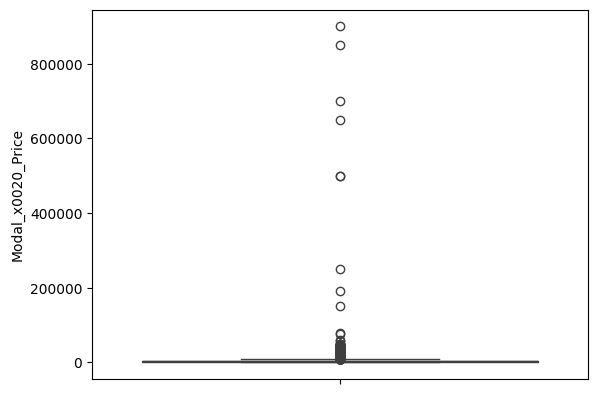

In [156]:
sns.boxplot(y=result['Modal_x0020_Price'],data=result)

In [149]:
def removel_box_plot(result, column, threshold):
  sns.boxplot(result[column])
  plt.title(f'original boxplot of {column}')
  plt.sow()

  removed_outliers = result[result[column] < threshold]

  sns.boxplot(removed_outliers[column])
  plt.title(f'boxplot of {column} after removing outliers')
  plt.show()

  return removed_outliers

  threshold=40
  no_outliers_result=removel_box_plot(result,'total_bill',threshold)

<Axes: ylabel='Max_x0020_Price'>

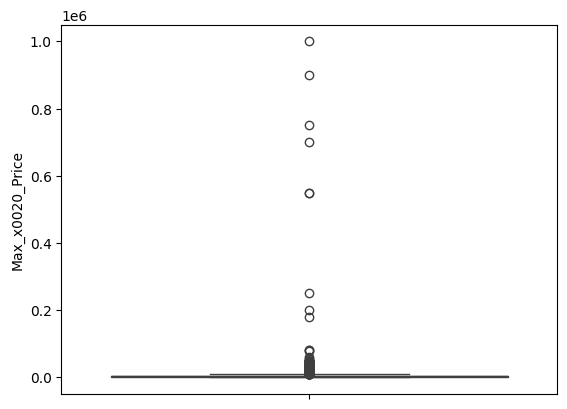

In [157]:
sns.boxplot(y=result['Max_x0020_Price'],data=result)

<Axes: ylabel='Min_x0020_Price'>

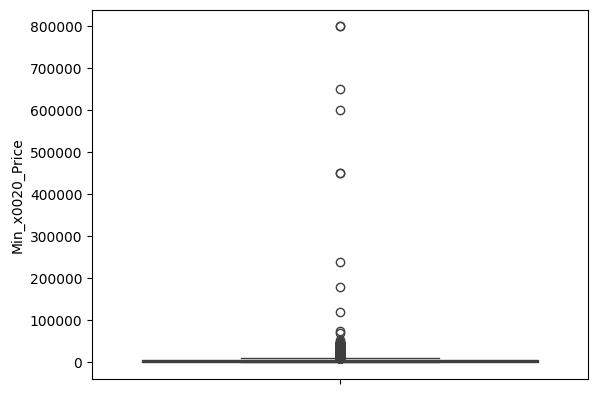

In [158]:
sns.boxplot(y=result['Min_x0020_Price'],data=result)

In [151]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [155]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([23179.32374233,   641.4633303 ,  1196.61419405, ...,
        2681.83499344,  6858.37506498,  1602.46900451])